In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
#import optuna
from sklearn import preprocessing
#import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 50)
        self.linear_2 = torch.nn.Linear(50, output_dim)
    def forward(self, x):
        out_1=self.linear(x)
        out_2=self.linear_2(out_1)
        outputs = torch.sigmoid(out_2)
        return outputs

In [21]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len

In [22]:
def get_data(data_type,file_num):

    if(data_type=='train'):
        data=pd.read_csv(f"Dataset/IHDP_a/ihdp_npci_train_{file_num}.csv")
    else:
        data = pd.read_csv(f"Dataset/IHDP_a/ihdp_npci_test_{file_num}.csv")

    x_data=pd.concat([data.iloc[:,0], data.iloc[:, 1:30]], axis = 1)
    #x_data=data.iloc[:, 5:30]
    y_data=data.iloc[:, 1]
    return x_data,y_data

In [23]:
def get_dataloader(x_data,y_data,batch_size):

    x_train_sr=x_data[x_data['treatment']==0]
    y_train_sr=y_data[x_data['treatment']==0]
    x_train_tr=x_data[x_data['treatment']==1]
    y_train_tr=y_data[x_data['treatment']==1]


    train_data_sr = Data(np.array(x_train_sr), np.array(y_train_sr))
    train_dataloader_sr = DataLoader(dataset=train_data_sr, batch_size=batch_size)

    train_data_tr = Data(np.array(x_train_tr), np.array(y_train_tr))
    train_dataloader_tr = DataLoader(dataset=train_data_tr, batch_size=batch_size)


    return train_dataloader_sr, train_dataloader_tr

In [34]:
def train_log_reg(X_train,y_train):
    epochs = 400
    input_dim = 25 # Two inputs x1 and x2 
    output_dim = 1 # Single binary output 
    learning_rate = 0.1
    model = LogisticRegression(input_dim,output_dim)
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    #x_data,y_data=get_data('train',1)
    #X_train, X_val,y_train, y_val = train_test_split(x_data,y_data ,random_state=42, test_size=0.20)
    #batch_loss=0
    train_loss=[]
    #val_loss=[]
    batch_size=32
    for i in range(epochs):
            batch_loss=0

            train_dataloader_sr, train_dataloader_tr=get_dataloader(X_train,y_train,batch_size)

            for batch_idx, (train_source_data, train_target_data) in enumerate(zip(train_dataloader_sr, train_dataloader_tr)):

                xs,ys=train_source_data
                xt,yt=train_target_data

                xs_train=xs[:,5:30]
                xt_train=xt[:,5:30]

                train_x=torch.cat((xs_train,xt_train),0)
                #train_y=torch.unsqueeze(torch.cat((ys,yt),0), dim=1)
                true_t=torch.unsqueeze(torch.cat((xs[:,0],xt[:,0]),0), dim=1)
                #concat_true=torch.cat((train_y,true_t),1)
                #concat_pred,phi=model(train_x)

                optimizer.zero_grad()
               # Setting our stored gradients equal to zero
                outputs = model(train_x)
                loss = criterion(outputs, true_t) # [200,1] -squeeze-> [200]
                loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
                batch_loss=batch_loss+loss.item()
                optimizer.step() 
            train_loss.append(batch_loss)
            
    X_train_n=X_train.to_numpy()
    X_train_n=torch.from_numpy(X_train_n.astype(np.float32))
    train_probs=model(X_train_n[:,5:30])
    #return train_probs,1-train_probs
    return model
        


In [31]:
def train_log_reg_2(X_train,y_train):
    epochs = 500
    input_dim = 25 # Two inputs x1 and x2 
    output_dim = 1 # Single binary output 
    learning_rate = 0.1
    model = LogisticRegression(input_dim,output_dim)
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    batch_size=32
    for i in range(epochs):
        true_t=torch.unsqueeze(y_train, dim=1)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, true_t) 
        loss.backward()
        optimizer.step() 
    print('trained')
    return model(X_train)

In [32]:
x_data,y_data=get_data('train',1)
X_train_n=x_data.to_numpy()
X_train_n=torch.from_numpy(X_train_n.astype(np.float32))
modelt=train_log_reg_2(X_train_n[:,5:30],X_train_n[:,0])
#p1n=modelt(X_train_n[:,5:30])
#p0n=1-p1n

trained


In [33]:
modelt

tensor([[0.3652],
        [0.0680],
        [0.1032],
        [0.1365],
        [0.1232],
        [0.3195],
        [0.3874],
        [0.2930],
        [0.3137],
        [0.2484],
        [0.1578],
        [0.0945],
        [0.4733],
        [0.2158],
        [0.1079],
        [0.1435],
        [0.2513],
        [0.4981],
        [0.1503],
        [0.1505],
        [0.2273],
        [0.2214],
        [0.0799],
        [0.1119],
        [0.1918],
        [0.1551],
        [0.2622],
        [0.3559],
        [0.1651],
        [0.3258],
        [0.0702],
        [0.1247],
        [0.0727],
        [0.2073],
        [0.1884],
        [0.2648],
        [0.0887],
        [0.2808],
        [0.3849],
        [0.0904],
        [0.2870],
        [0.2999],
        [0.3871],
        [0.3954],
        [0.2387],
        [0.3060],
        [0.0939],
        [0.2590],
        [0.3420],
        [0.2961],
        [0.3511],
        [0.2010],
        [0.4230],
        [0.2841],
        [0.1680],
        [0

In [30]:
torch.where(p1n>=0.5,1,0)

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

In [99]:
p11

tensor([[0.3355],
        [0.0646],
        [0.1077],
        [0.1658],
        [0.1296],
        [0.2959],
        [0.3447],
        [0.2706],
        [0.2702],
        [0.2761],
        [0.1505],
        [0.1019],
        [0.4175],
        [0.2085],
        [0.1013],
        [0.1583],
        [0.2596],
        [0.4444],
        [0.1633],
        [0.1435],
        [0.2359],
        [0.1958],
        [0.0790],
        [0.1145],
        [0.2141],
        [0.1535],
        [0.2941],
        [0.3779],
        [0.1673],
        [0.3085],
        [0.0703],
        [0.1351],
        [0.0747],
        [0.2164],
        [0.1769],
        [0.2530],
        [0.0948],
        [0.2655],
        [0.3592],
        [0.0909],
        [0.2595],
        [0.2783],
        [0.3675],
        [0.3769],
        [0.2136],
        [0.3170],
        [0.0941],
        [0.2219],
        [0.3145],
        [0.2774],
        [0.3213],
        [0.2195],
        [0.3672],
        [0.3086],
        [0.1835],
        [0

In [35]:
x_data,y_data=get_data('train',1)

model=train_log_reg(x_data,y_data)


       
X_train_n=x_data.to_numpy()
X_train_n=torch.from_numpy(X_train_n.astype(np.float32))
tarin_outs=model(X_train_n[:,5:30])



In [36]:
tarin_outs

tensor([[0.3258],
        [0.0189],
        [0.1075],
        [0.1125],
        [0.0204],
        [0.2259],
        [0.3921],
        [0.2307],
        [0.2706],
        [0.1016],
        [0.0221],
        [0.0308],
        [0.4912],
        [0.3188],
        [0.0911],
        [0.1531],
        [0.3874],
        [0.5182],
        [0.0156],
        [0.2150],
        [0.0756],
        [0.2201],
        [0.0256],
        [0.1046],
        [0.0760],
        [0.0154],
        [0.1617],
        [0.3258],
        [0.1729],
        [0.1153],
        [0.1359],
        [0.0050],
        [0.0480],
        [0.0527],
        [0.0558],
        [0.1546],
        [0.0304],
        [0.0893],
        [0.2078],
        [0.0336],
        [0.0543],
        [0.4004],
        [0.4865],
        [0.3716],
        [0.0833],
        [0.0718],
        [0.0975],
        [0.2214],
        [0.5994],
        [0.4503],
        [0.1713],
        [0.2413],
        [0.3016],
        [0.1166],
        [0.0162],
        [0

In [29]:

       
X_val_n=X_val.to_numpy()
X_val_n=torch.from_numpy(X_val_n.astype(np.float32))
val_outs=model(X_val_n[:,5:30])
val_los=criterion(val_outs, torch.unsqueeze(X_val_n[:,0],dim=1))
val_loss.append(val_los.item())
        

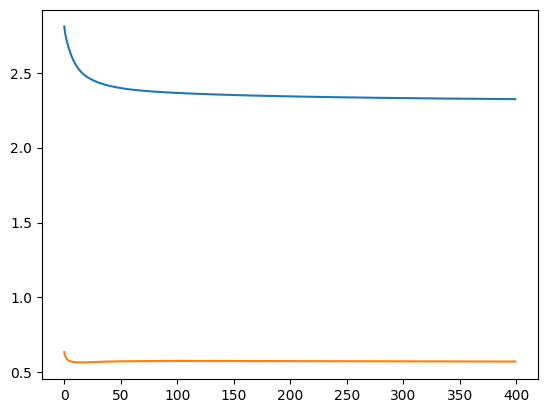

In [33]:
plt.plot(train_loss)
#plt.plot(val_loss)

In [67]:
X_train_n=X_train.to_numpy()
X_train_n=torch.from_numpy(X_train_n.astype(np.float32))
train_probs=model(X_train_n[:,5:30])

train_class=torch.where(train_probs>=0.5,1,0)
total_train=X_train_n.size(0)
correct_train= np.sum(torch.squeeze(train_class).detach().numpy() == X_train_n[:,0].detach().numpy())
accuracy_train= 100 * correct_train/total_train
##################################
val_probs=model(X_val_n[:,5:30])
val_class=torch.where(val_probs>=0.5,1,0)
#predicted_test = outputs.round().detach().numpy()
total_val=X_val_n.size(0)
correct_val= np.sum(torch.squeeze(val_class).detach().numpy() == X_val_n[:,0].detach().numpy())
accuracy_val= 100 * correct_val/total_val

In [66]:
accuracy_val

68.88888888888889

In [68]:
accuracy_train

73.60594795539033

In [69]:
p_1=train_probs
p_0=1-train_probs

In [70]:
p_1

tensor([[0.6286],
        [0.6915],
        [0.3499],
        [0.6758],
        [0.7219],
        [0.0937],
        [0.4853],
        [0.5704],
        [0.7214],
        [0.2602],
        [0.0546],
        [0.1470],
        [0.5777],
        [0.1460],
        [0.1402],
        [0.2375],
        [0.0241],
        [0.3848],
        [0.2497],
        [0.5444],
        [0.7280],
        [0.2133],
        [0.4742],
        [0.4795],
        [0.0598],
        [0.2804],
        [0.7474],
        [0.2114],
        [0.2355],
        [0.1738],
        [0.0807],
        [0.5417],
        [0.3613],
        [0.6152],
        [0.1388],
        [0.3372],
        [0.1248],
        [0.6521],
        [0.2435],
        [0.1965],
        [0.6212],
        [0.1290],
        [0.2259],
        [0.7452],
        [0.7432],
        [0.4826],
        [0.1702],
        [0.1637],
        [0.7998],
        [0.1273],
        [0.2347],
        [0.1456],
        [0.7712],
        [0.4064],
        [0.5485],
        [0

In [71]:
p_0

tensor([[0.3714],
        [0.3085],
        [0.6501],
        [0.3242],
        [0.2781],
        [0.9063],
        [0.5147],
        [0.4296],
        [0.2786],
        [0.7398],
        [0.9454],
        [0.8530],
        [0.4223],
        [0.8540],
        [0.8598],
        [0.7625],
        [0.9759],
        [0.6152],
        [0.7503],
        [0.4556],
        [0.2720],
        [0.7867],
        [0.5258],
        [0.5205],
        [0.9402],
        [0.7196],
        [0.2526],
        [0.7886],
        [0.7645],
        [0.8262],
        [0.9193],
        [0.4583],
        [0.6387],
        [0.3848],
        [0.8612],
        [0.6628],
        [0.8752],
        [0.3479],
        [0.7565],
        [0.8035],
        [0.3788],
        [0.8710],
        [0.7741],
        [0.2548],
        [0.2568],
        [0.5174],
        [0.8298],
        [0.8363],
        [0.2002],
        [0.8727],
        [0.7653],
        [0.8544],
        [0.2288],
        [0.5936],
        [0.4515],
        [0